In [2]:
import os, sys
import numpy as np
import pandas as pd 
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import corner
sys.path.insert(0, 'hackurdc2_utils')
import units
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [6]:
data_dir = 'demo_data'
src_path = os.path.join(data_dir, 'source_catalog_full.csv')
src = pd.read_csv(src_path, index_col=None)

In [7]:
obs_history_path = os.path.join(data_dir, 'obs_history.csv')
obs_history = pd.read_csv(obs_history_path, index_col=None)

In [8]:
src.columns

Index(['Ix', 'Ixx', 'Ixx_PSF', 'Ixy', 'Iy', 'Iyy', 'apFlux', 'apFluxErr',
       'ccdVisitId', 'expMJD', 'num_agn_neighbors', 'num_gal_neighbors',
       'num_sprinkled_neighbors', 'num_star_neighbors', 'objectId', 'sky'],
      dtype='object')

In [9]:
src['objectId'] = src['objectId'].astype('int64')
src[['num_agn_neighbors', 'num_gal_neighbors', 'num_sprinkled_neighbors', 'expMJD', 'ccdVisitId']] = src[['num_agn_neighbors', 'num_gal_neighbors', 'num_sprinkled_neighbors', 'expMJD', 'ccdVisitId']].astype('int32')

In [12]:
src[[ 'objectId', 'Ix', 'Ixx', 'Ixx_PSF', 'Ixy', 'Iy', 'Iyy', 'apFlux', 'apFluxErr',
       'ccdVisitId', 'expMJD', 'sky']].head(10)

,objectId,Ix,Ixx,Ixx_PSF,Ixy,Iy,Iyy,apFlux,apFluxErr,ccdVisitId,expMJD,sky
0,4000330622,55.579921,1.337158,0.201040,0.007957,-34.979455,1.336745,0.574701,0.098030,2340,59583,22.197691
1,4000330622,55.579921,1.335587,0.199470,0.007957,-34.979455,1.335175,18.134200,0.602330,5767,59588,17.000000
2,4000330622,55.579921,1.242842,0.106724,0.007957,-34.979455,1.242429,15.177020,0.157892,8004,59591,18.321369
3,4000330622,55.579921,1.266927,0.130809,0.007957,-34.979455,1.266514,15.202946,0.176510,8046,59591,18.305078
4,4000330622,55.579921,1.298163,0.162045,0.007957,-34.979455,1.297750,17.586682,0.477653,12455,59597,17.300000
5,4000330622,55.579921,1.279046,0.142928,0.007957,-34.979455,1.278633,18.523089,0.450756,12484,59597,17.300000
6,4000330622,55.579921,1.433549,0.297432,0.007957,-34.979455,1.433137,15.921644,0.294100,13276,59598,18.095105
7,4000330622,55.579921,1.466585,0.330467,0.007957,-34.979455,1.466172,14.778267,0.332161,13330,59598,17.957957
8,4000330622,55.579921,1.393540,0.257422,0.007957,-34.979455,1.393127,14.391193,0.449258,32633,59624,17.000000
9,4000330622,55.579921,1.420258,0.284140,0.007957,-34.979455,1.419845,14.986025,0.473633,32676,59624,17.000000


In [17]:
src['ccdVisitId'] = src['ccdVisitId'].astype(int)
obs_history = obs_history[['ccdVisitId', 'filter']].copy()
src = pd.merge(src, obs_history, on='ccdVisitId', how='left')

In [20]:
src_per_filter={}
obj_per_filter={}
for bp in 'ugrizy':
    src_bp = src.query('filter==@bp')
    obj_per_filter[bp] = src_bp.groupby('objectId').mean()
    src_per_filter[bp] = src_bp

In [22]:
# Choose a random system with 2 galaxies blended together.
sample_id = src.loc[src['num_gal_neighbors']==1]['objectId'].unique()[1]
sample_lc = src.loc[src['objectId']==sample_id][['filter', 'apFlux', 'expMJD', 'ccdVisitId', 'apFluxErr']]

Text(0.5,0,'days')

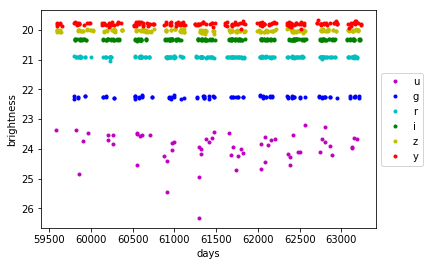

In [26]:
# Plot light curve
color_dict = {'u': 'm', 'g': 'b', 'r': 'c', 'i': 'g', 'z': 'y', 'y': 'r'}
for bp in 'ugrizy':
    times = sample_lc.loc[sample_lc['filter']==bp]['expMJD'].values
    fluxes = sample_lc.loc[sample_lc['filter']==bp]['apFlux'].values
    mags = units.flux_to_mag(fluxes, from_unit='nMgy')
    plt.plot(times, mags, color_dict[bp] + '.', label=bp)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax = plt.gca()
ax.invert_yaxis()
plt.ylabel('brightness')
plt.xlabel('days')
#plt.ylabel('magnitude')
#plt.xlabel('expMJD')

In [8]:
obj[obj['num_star_neighbors'] > 0].shape

(1, 15)

In [17]:
src['objectId'].nunique()

1000

In [6]:
obj = src.groupby('objectId').mean()

In [ ]:
obj['mag'] = 

In [11]:
fig_dict = {}

In [54]:
obj['Ix_offset'] = obj['Ix'].values - 55.1271858215332
obj['Iy_offset'] = obj['Iy'].values + 33.4480018615723

In [9]:
def draw_cornerplot(attribute_list, df, units='arcsec', fig=None, color='black'):
    num_attributes = len(attribute_list)
    num_data = len(df)
    labels = [a + ' / ' + units for a in attribute_list]
    data = df[attribute_list][:].values.reshape(-1, num_attributes)
    plot = corner.corner(data, 
                        color=color, 
                        smooth=1.0, 
                        show_titles=True,
                        labels=labels,
                        fill_contours=True,
                        bins=30,
                        fig=fig,
                        range=[0.999]*num_attributes,
                        hist_kwargs=dict(density=True),) #, log=True,),
                        #hist2d_kwargs=dict(log=True),)
    return plot

In [1]:
bp_colors = {'u': 'purple', 'g':'blue', 'r':'green', 'i':'yellow', 'z':'orange', 'y':'red'}

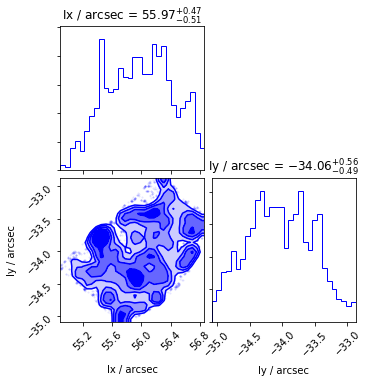

In [12]:
fig_dict['first_moments'] = draw_cornerplot(['Ix', 'Iy'], obj, units='arcsec', color='blue')

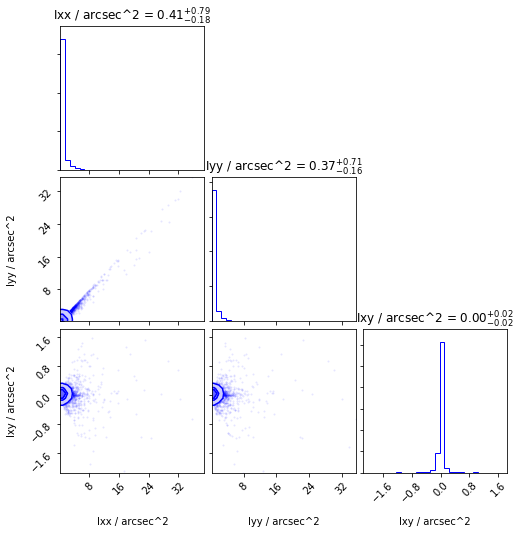

In [13]:
fig_dict['second_moments'] = draw_cornerplot(['Ixx', 'Iyy', 'Ixy'], obj, units='arcsec^2', color='blue')

/opt/lsst/software/stack/python/miniconda3-4.5.4/envs/lsst-scipipe-fcd27eb/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.18796368975795819, right=0.18796368975795819
  'left=%s, right=%s') % (left, right))


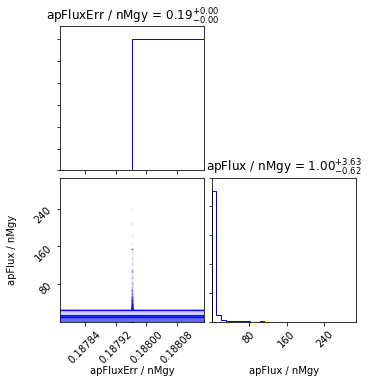

In [14]:
fig_dict['second_moments'] = draw_cornerplot(['apFluxErr', 'apFlux'], obj, units='nMgy', color='blue')

In [83]:
np.random.normal(0.0, np.array([1,2,3]))

array([-0.5155406 ,  1.51837465, -2.41893007])